In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=56ee96cf1afbe149590ff90c54a0a712


In [8]:
cities

['la paz',
 'vila franca do campo',
 'iqaluit',
 'yar-sale',
 'deputatskiy',
 'punta arenas',
 'ushuaia',
 'albany',
 'prince rupert',
 'parabel',
 'rikitea',
 'sudbury',
 'cape town',
 'busselton',
 'tura',
 'taolanaro',
 'lebu',
 'tual',
 'kaitangata',
 'mar del plata',
 'guerrero negro',
 'muzaffarabad',
 'santa fe',
 'provideniya',
 'sentyabrskiy',
 'baykit',
 'saint-philippe',
 'atuona',
 'vuktyl',
 'zeya',
 'kaiwaka',
 'tuktoyaktuk',
 'makakilo city',
 'hobart',
 'butaritari',
 'vaini',
 'qaanaaq',
 'grindavik',
 'arraial do cabo',
 'huangpi',
 'margate',
 'castro',
 'saskylakh',
 'pooc',
 'puerto ayora',
 'waipawa',
 'nadym',
 'kirakira',
 'akdepe',
 'bartoszyce',
 'mataura',
 'novobirilyussy',
 'soyo',
 'samarai',
 'hamilton',
 'bluff',
 'cherskiy',
 'jamestown',
 'grand river south east',
 'puerto baquerizo moreno',
 'pacific grove',
 'kapaa',
 'opuwo',
 'abu samrah',
 'victoria',
 'jumla',
 'sangar',
 'turukhansk',
 'tahe',
 'ponta do sol',
 'cabedelo',
 'dunedin',
 'sumbe',


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

 lompoc
Processing Record 32 of Set 4 | petropavlovka
Processing Record 33 of Set 4 | itarema
Processing Record 34 of Set 4 | toliary
City not found. Skipping...
Processing Record 35 of Set 4 | jizan
Processing Record 36 of Set 4 | laguna
Processing Record 37 of Set 4 | marquette
Processing Record 38 of Set 4 | marawi
Processing Record 39 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 4 | tiksi
Processing Record 41 of Set 4 | caravelas
Processing Record 42 of Set 4 | kodinsk
Processing Record 43 of Set 4 | pout
Processing Record 44 of Set 4 | prattville
Processing Record 45 of Set 4 | dingle
Processing Record 46 of Set 4 | atambua
Processing Record 47 of Set 4 | orgun
City not found. Skipping...
Processing Record 48 of Set 4 | tazovskiy
Processing Record 49 of Set 4 | palmer
Processing Record 50 of Set 4 | oyama
Processing Record 1 of Set 5 | saint-pierre
Processing Record 2 of Set 5 | hailar
Processing Record 3 of Set 5 | lushunkou
City not found. Skipping.

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,La Paz,-16.5000,-68.1500,37.40,93,75,2.30,BO,2021-05-07 04:13:41
1,Vila Franca Do Campo,37.7167,-25.4333,62.60,94,75,10.36,PT,2021-05-07 04:15:08
2,Iqaluit,63.7506,-68.5145,30.20,93,90,8.05,CA,2021-05-07 04:15:09
3,Yar-Sale,66.8333,70.8333,31.62,97,100,19.42,RU,2021-05-07 04:15:09
4,Deputatskiy,69.3000,139.9000,27.70,91,100,4.65,RU,2021-05-07 04:15:09
5,Punta Arenas,-53.1500,-70.9167,42.80,87,75,5.75,CL,2021-05-07 04:15:10
6,Ushuaia,-54.8000,-68.3000,41.00,75,0,4.61,AR,2021-05-07 04:11:29
7,Albany,42.6001,-73.9662,48.00,75,100,4.92,US,2021-05-07 04:11:46
8,Prince Rupert,54.3161,-130.3201,48.20,76,90,14.97,CA,2021-05-07 04:15:05
9,Parabel,58.6978,81.4825,53.96,49,7,13.02,RU,2021-05-07 04:15:11


In [11]:
new_column_order = ["City", "Country", "Date",  "Lat", "Lng", "Max Temp",  "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,La Paz,BO,2021-05-07 04:13:41,-16.5000,-68.1500,37.40,93,75,2.30
1,Vila Franca Do Campo,PT,2021-05-07 04:15:08,37.7167,-25.4333,62.60,94,75,10.36
2,Iqaluit,CA,2021-05-07 04:15:09,63.7506,-68.5145,30.20,93,90,8.05
3,Yar-Sale,RU,2021-05-07 04:15:09,66.8333,70.8333,31.62,97,100,19.42
4,Deputatskiy,RU,2021-05-07 04:15:09,69.3000,139.9000,27.70,91,100,4.65
5,Punta Arenas,CL,2021-05-07 04:15:10,-53.1500,-70.9167,42.80,87,75,5.75
6,Ushuaia,AR,2021-05-07 04:11:29,-54.8000,-68.3000,41.00,75,0,4.61
7,Albany,US,2021-05-07 04:11:46,42.6001,-73.9662,48.00,75,100,4.92
8,Prince Rupert,CA,2021-05-07 04:15:05,54.3161,-130.3201,48.20,76,90,14.97
9,Parabel,RU,2021-05-07 04:15:11,58.6978,81.4825,53.96,49,7,13.02


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

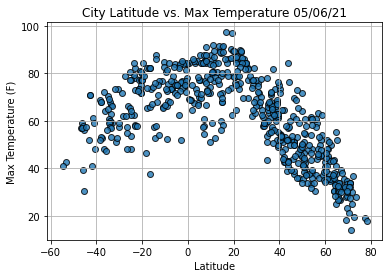

In [14]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

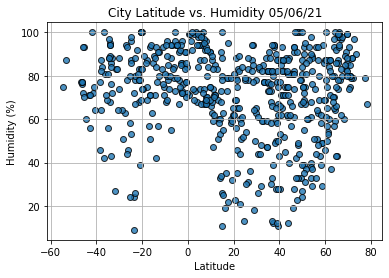

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

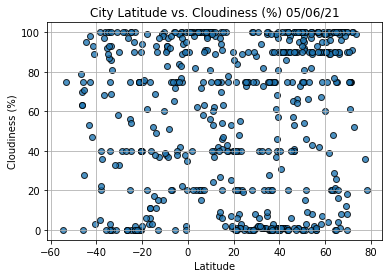

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

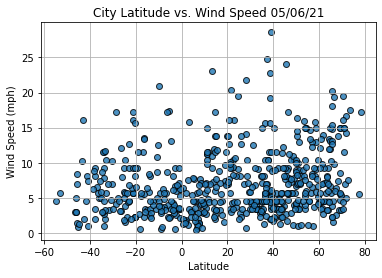

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]